References:

1. https://medium.com/datadriveninvestor/introduction-to-stock-analysis-in-python-574246e689e3


In [3]:
import pandas as pd
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

C:\Users\tjtek\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [9]:
start_date = datetime.datetime(2005, 1, 1)
end_date = datetime.datetime(2020, 6, 10)

In [10]:
google = web.DataReader('GOOG', 'yahoo', start_date, end_date)
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,101.439781,97.365051,98.331429,100.976517,31807000.0,100.976517
2005-01-04,101.086105,96.378746,100.323959,96.886841,27614900.0,96.886841
2005-01-05,98.082367,95.756081,96.363808,96.393692,16534800.0,96.393692
2005-01-06,97.584229,93.509506,97.175758,93.922951,20851900.0,93.922951
2005-01-07,96.762314,94.037521,94.964050,96.563057,19398200.0,96.563057


In [11]:
microsoft = web.DataReader('MSFT', 'yahoo', start_date, end_date)
microsoft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,26.950001,26.650000,26.799999,26.740000,65002900.0,19.293917
2005-01-04,27.100000,26.660000,26.870001,26.840000,109442100.0,19.366064
2005-01-05,27.100000,26.760000,26.840000,26.780001,72463500.0,19.322775
2005-01-06,27.059999,26.639999,26.850000,26.750000,76890500.0,19.301130
2005-01-07,26.889999,26.620001,26.820000,26.670000,68723300.0,19.243410


In [12]:
# deleting all columns and keeping just the date and adjusted close price
goog_close = google.drop(google.columns[0:5], axis=1)
msft_close = microsoft.drop(microsoft.columns[0:5], axis=1)

> A common approach is to use the close value for analysis and prediction, but which one to choose, as we have “close” and “adjusted close”? Well, according to some sources, like this one and this one, the adjusted price is the most indicated, as it represents a fair picture of the share price, including factors like payment of dividends, stock splits, etc. It’s the one we will use today, but how do we select that? Easy-peasy:

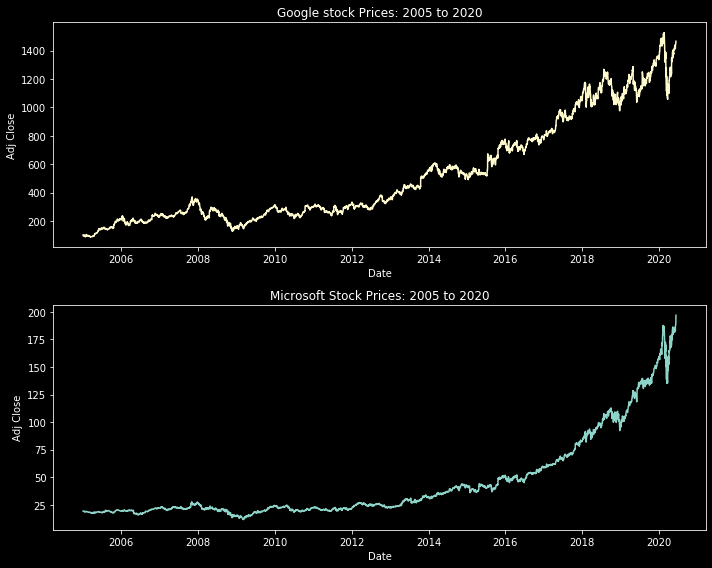

In [13]:
# visualization

style.use('dark_background')
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
sns.lineplot(x=goog_close.index, y=goog_close['Adj Close'], color='lemonchiffon')
plt.title('Google stock Prices: 2005 to 2020')

plt.subplot(2, 1, 2)
ax2 = sns.lineplot(x=msft_close.index, y=msft_close['Adj Close'])
plt.title('Microsoft Stock Prices: 2005 to 2020')
plt.tight_layout()

Google has more volatility than Mocrosoft.

Both companies lost value during 2008, 2015, 2019 and 2020, but they have recuperated their value quite fast.

Google has grown in a relative constant pace since 2012. For Microsoft, we can see a strong ascension curve just after 2014.

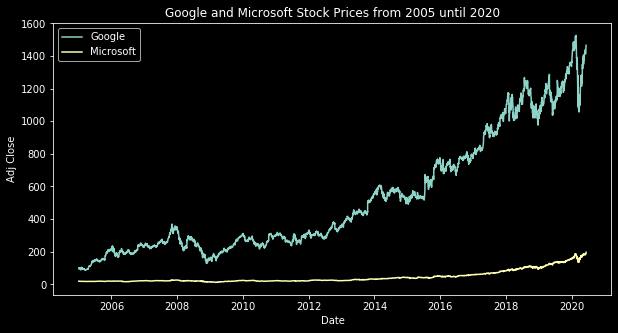

In [15]:
# let's visualize in a line plot how our stocks performed overtime 

# Adjusting the style 
style.use('dark_background')
plt.figure(figsize=(10,5))
ax1= sns.lineplot(x=goog_close.index, y= goog_close['Adj Close'], label='Google')

ax2= sns.lineplot(x=msft_close.index, y=msft_close['Adj Close'], label='Microsoft');

plt.title("Google and Microsoft Stock Prices from 2005 until 2020")

plt.legend()

plt.show()